<a href="https://colab.research.google.com/github/plaban1981/MachieHack/blob/master/Glass_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()

Saving Glass_Quality_Participants_Data.zip to Glass_Quality_Participants_Data.zip


{'Glass_Quality_Participants_Data.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00]x\xb6P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x00 \x00Glass_Quality_Participants_Data/UT\r\x00\x07J\x9c\xc7^J\x9c\xc7^J\x9c\xc7^ux\x0b\x00\x01\x04\xf6\x01\x00\x00\x04\x14\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\xfaS\xb4P\x00\x00\x00\x00\x00\x00\x00\x00P\x99\x00\x00(\x00 \x00Glass_Quality_Participants_Data/Test.csvUT\r\x00\x07\xc0\xb9\xc4^=\x9c\xc7^<\x9c\xc7^ux\x0b\x00\x01\x04\xf6\x01\x00\x00\x04\x14\x00\x00\x00u\x9d\xeb\x8e,[n\x9c\xff\xfbY\x12\x89u\xbf\xfc4\xfc \x83\x81<\x90\x05\xebbX20z{\xc7\x17\xcc\xaa\xdd]\xab$\x9d\xcc\xb5\xcf\x99\xdd\xd9\x99\xebB\x06\xc9 \xf9\x8f\xff\xf7\xaf\xff\xf3o\x7f\xf9\xef\x7f\xf9\x1f\xff\xf6/\xff\xe7\xdf\xfe\xf5o\xff\xfa\x1f\x7f\xc9\xd7?\x1e\xff\xad\\\xff\xf2\xd7\xbf\xff\xe5\x9f\xff\xdf\xbf\xfc\xd3\xbf\xfe\xdb\xbf\xff\xd3\x7f\xfc\xe7\xf5\x1f\xff\xeb\x9f\xfe\xe1\x7f\xff\xeb\xdf\xfe\xfd\xdf\xaf\xbf\xeb\xbf\xe9\xf6\xd7\xbf_\xff\xc9\x9f\xfe\x93?\xfd\x9f\x7f\xfa\xfb\xdf\x

In [3]:
!unzip Glass_Quality_Participants_Data.zip

Archive:  Glass_Quality_Participants_Data.zip
   creating: Glass_Quality_Participants_Data/
  inflating: Glass_Quality_Participants_Data/Test.csv  
  inflating: __MACOSX/Glass_Quality_Participants_Data/._Test.csv  
  inflating: Glass_Quality_Participants_Data/Sample_Submission.xlsx  
  inflating: __MACOSX/Glass_Quality_Participants_Data/._Sample_Submission.xlsx  
  inflating: Glass_Quality_Participants_Data/Train.csv  
  inflating: __MACOSX/Glass_Quality_Participants_Data/._Train.csv  


In [108]:
data = pd.read_csv('/content/Glass_Quality_Participants_Data/Train.csv')
data.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [0]:
test = pd.read_csv('/content/Glass_Quality_Participants_Data/Test.csv')

In [113]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


# Check Null Values

In [109]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

# Data statistics

In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
grade_A_Component_1,1358.0,4.064801e-01,4.913571e-01,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
grade_A_Component_2,1358.0,5.935199e-01,4.913571e-01,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00
max_luminosity,1358.0,1.378932e+02,2.048051e+01,71.000000,127.000000,1.370000e+02,1.460000e+02,2.660000e+02
thickness,1358.0,7.897791e+01,5.532484e+01,35.000000,42.000000,6.600000e+01,8.300000e+01,3.050000e+02
xmin,1358.0,5.673704e+02,5.220131e+02,0.000000,53.000000,4.075000e+02,1.041750e+03,1.692000e+03
xmax,1358.0,6.140324e+02,5.005055e+02,4.000000,192.000000,4.570000e+02,1.064000e+03,1.717000e+03
ymin,1358.0,1.660107e+06,1.778153e+06,7527.000000,466274.250000,1.216168e+06,2.210012e+06,1.291748e+07
ymax,1358.0,1.660139e+06,1.778177e+06,7453.000000,466691.750000,1.214700e+06,2.210076e+06,1.291731e+07
pixel_area,1358.0,1.903403e+03,3.839157e+03,3.000000,234.000000,3.460000e+02,9.152500e+02,3.739200e+04
log_area,1358.0,1.903896e+03,3.839163e+03,3.445293,234.335948,3.460445e+02,9.153678e+02,3.739267e+04


# Visualize corelation

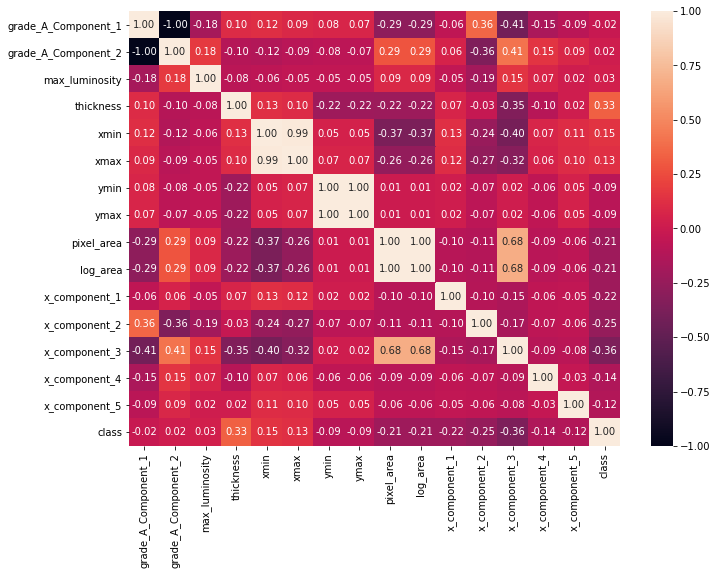

In [111]:
plt.figure(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

grade_A_component_1 and grade_A_component_2 are highly correlated, hence we can drop on of these features

# Target Distribution

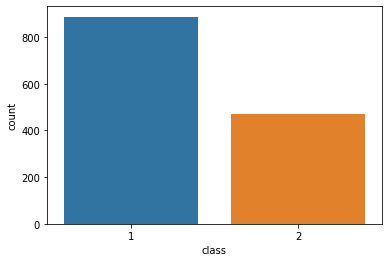

In [114]:
sns.countplot(data['class'])

In [11]:
data['class'].value_counts(normalize=True)

1    0.653166
2    0.346834
Name: class, dtype: float64

<Figure size 792x576 with 0 Axes>

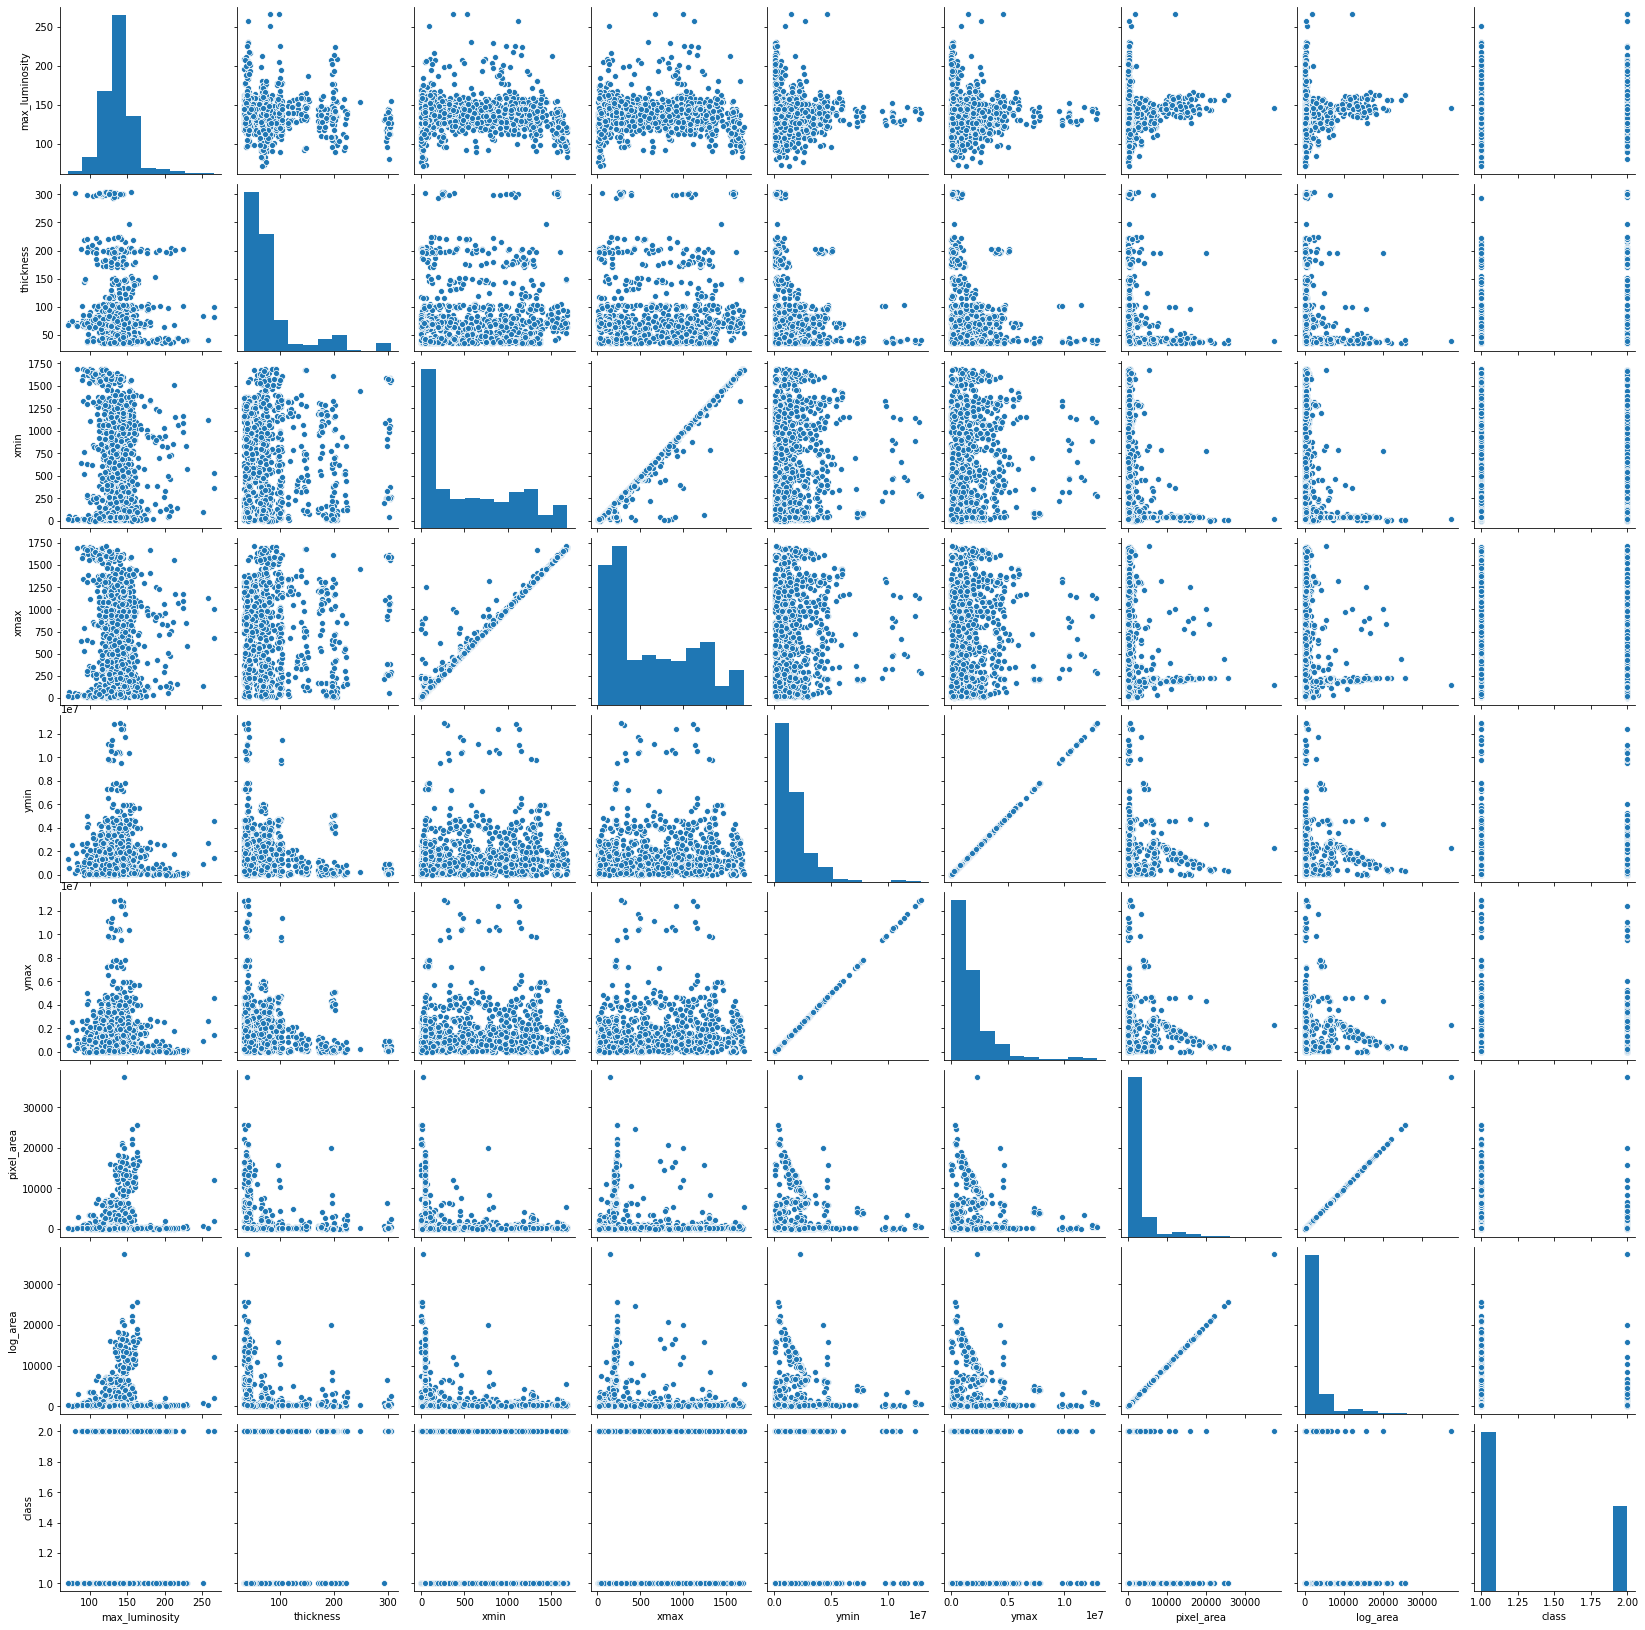

In [5]:
plt.figure(figsize=(11,8))
sns.pairplot(data[['max_luminosity','thickness','xmin',	'xmax',	'ymin','ymax','pixel_area','log_area','class']])

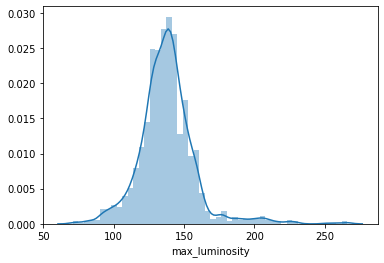

In [8]:
sns.distplot(data['max_luminosity'])

# Creating Numerical and Categorical columns

In [0]:
num_cols = list(data.columns[2:10])
categorical_cols = [i for i in data.drop('class', axis=1).columns if i not in num_cols]

# Numerical columns distribution in training and testing set

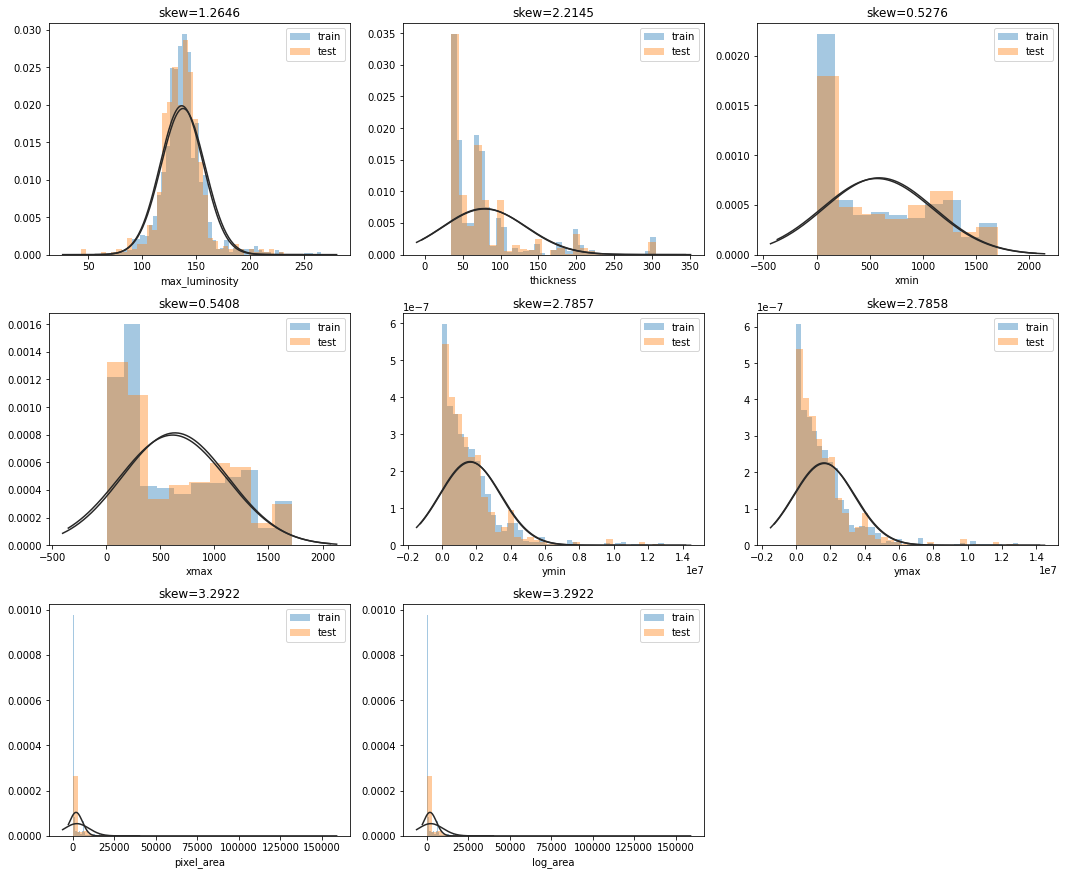

In [125]:
from scipy import stats
from scipy.stats import norm, skew
fcols = 3
frows = len(num_cols)
plt.figure(figsize=(5*fcols,4*frows));

i=0
for col in num_cols:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(data[col].dropna() , fit=stats.norm, kde=False,label='train')
    sns.distplot(test[col].dropna() , fit=stats.norm, kde=False,label='test')
    plt.title('skew='+'{:.4f}'.format(stats.skew(data[col])))
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()


Numerical columns seem to be equally distributed among training and testing set.

# Categorical column distributions in training and testing sets

In [0]:

dataviz = pd.concat([data, test], ignore_index=True)
dataviz['is_train'] = np.where(dataviz['class'].isnull(), 1, 0)

In [127]:
len(categorical_cols)

7

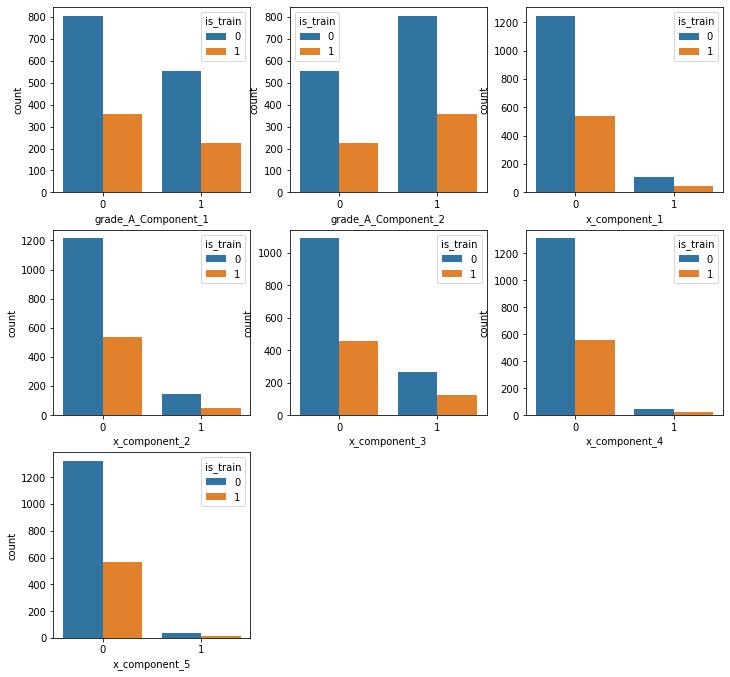

In [129]:
fcols = 3
frows = len(categorical_cols)
plt.figure(figsize=(12,4*frows))
i=0
for col in categorical_cols:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.countplot(dataviz[col],hue=dataviz['is_train'])
    


* Categorical columns too seem to be equally distributed in training and testing sets
* x_component_x columns seem to have very low instances in positive class

# Relationship between independent categorical and target variable

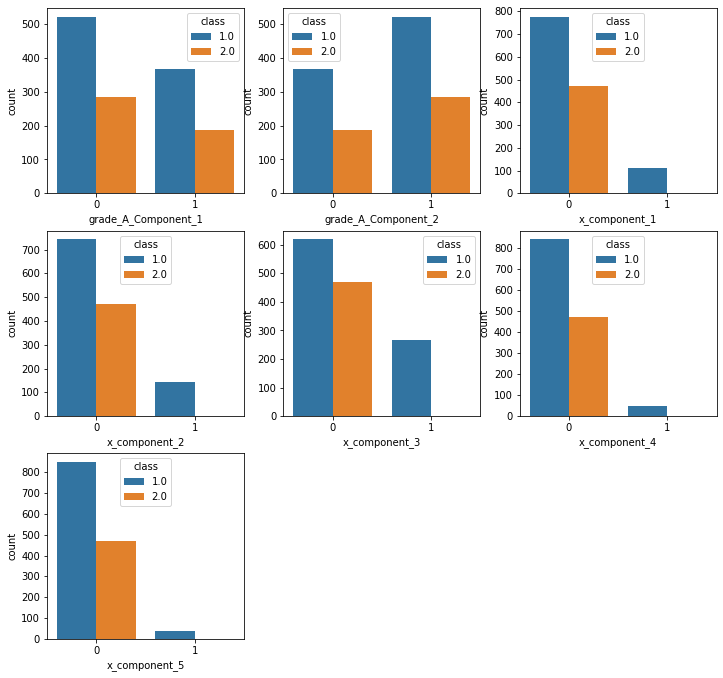

In [131]:
fcols =3
frows = len(categorical_cols)
plt.figure(figsize=(12,4*frows))
i = 0
for i,col in enumerate(categorical_cols):
  plt.subplot(frows,fcols,i+1)
  sns.countplot(dataviz[col],hue=dataviz['class'])

Well, it seems like we found a RULE, wherever x_component_x == 1, class is always == 1
Also during EDA it was observed that grade_A_component_x and x_component_x columns were one-hot encoded

# Model Building and Evaluation

In [0]:
X = data.drop('class', axis=1)
y = data['class'].values
Xt = test.copy()

####Reverse the one-hot encoding on x_compnent_x columns and convert it into ordinals

In [0]:
x_component = ['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']

In [0]:
def reverse_ohe(row):
    for c in x_component:
        if row[c]==1:
            return c

In [0]:
X['x_component'] = X[x_component].apply(reverse_ohe, axis=1)
Xt['x_component'] = Xt[x_component].apply(reverse_ohe, axis=1)

In [136]:
X.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,x_component
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,x_component_3
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,x_component_1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,None
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,x_component_3
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,None


In [144]:
ordered = X['x_component'].value_counts().index
ordered ={k:v for v,k in enumerate(ordered)}
ordered

{'x_component_1': 2,
 'x_component_2': 1,
 'x_component_3': 0,
 'x_component_4': 3,
 'x_component_5': 4}

In [0]:
X.drop(['grade_A_Component_1', 'x_component','pixel_area'], axis=1, inplace=True)
Xt.drop(['grade_A_Component_1', 'x_component','pixel_area'], axis=1, inplace=True)

# Feature Engineering 

In [0]:
X['xmin_sub_xmax'] = abs(X['xmin'] - X['xmax'])
X['thickness_sub_max_luminosity'] = abs(X['thickness'] - X['max_luminosity'])

X['thickness_div_max_luminosity'] = X['thickness'] / X['max_luminosity']
X['xmin_div_xmax'] = X['xmin'] / X['xmax']
X['xmax_div_thickness'] = X['xmax'] / X['thickness']
X['ymin_div_thickness'] = X['ymin'] / X['thickness']

X['max_luminosity_mul_thickness'] = X['max_luminosity'] * X['thickness']
X['xmax_mul_thickness'] = X['xmax'] * X['thickness']
X['ymin_mul_thickness'] = X['ymin'] * X['thickness']
X['ymax_mul_thickness'] = X['ymax'] * X['thickness']
X['logarea_mul_thickness'] = X['log_area'] * X['thickness']



Xt['xmin_sub_xmax'] = abs(Xt['xmin'] - Xt['xmax'])
Xt['thickness_sub_max_luminosity'] = abs(Xt['thickness'] - Xt['max_luminosity'])

Xt['thickness_div_max_luminosity'] = Xt['thickness'] / Xt['max_luminosity']
Xt['xmin_div_xmax'] = Xt['xmin'] / Xt['xmax']
Xt['xmax_div_thickness'] = Xt['xmax'] / Xt['thickness']
Xt['ymin_div_thickness'] = Xt['ymin'] / Xt['thickness']

Xt['max_luminosity_mul_thickness'] = Xt['max_luminosity'] * Xt['thickness']
Xt['xmax_mul_thickness'] = Xt['xmax'] * Xt['thickness']
Xt['ymin_mul_thickness'] = Xt['ymin'] * Xt['thickness']
Xt['ymax_mul_thickness'] = Xt['ymax'] * Xt['thickness']
Xt['logarea_mul_thickness'] = Xt['log_area'] * Xt['thickness']

In [147]:
X.shape, Xt.shape

((1358, 24), (583, 24))

In [0]:
train = X.copy()
train['class'] = y

In [152]:
train[train.columns].corr()['class'][:].sort_values(ascending=False)

class                           1.000000
max_luminosity_mul_thickness    0.336188
thickness                       0.329639
thickness_div_max_luminosity    0.307814
xmax_mul_thickness              0.232640
xmin_div_xmax                   0.213393
xmin                            0.147477
xmax                            0.130023
max_luminosity                  0.031459
xmax_div_thickness              0.029327
ymin_mul_thickness              0.018071
ymax_mul_thickness              0.018062
grade_A_Component_2             0.017173
thickness_sub_max_luminosity   -0.000150
logarea_mul_thickness          -0.068202
ymax                           -0.092485
ymin                           -0.092489
ymin_div_thickness             -0.119506
x_component_5                  -0.123638
x_component_4                  -0.139487
xmin_sub_xmax                  -0.139514
log_area                       -0.214127
x_component_1                  -0.217409
x_component_2                  -0.250969
x_component_3   

# training the classifier

In [0]:
from sklearn import model_selection
from sklearn import metrics
SEED = 42
FOLDS = 5

skf = model_selection.StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)

In [155]:
%%time

logloss = list()
oof_etc = np.zeros((len(X),2))
cv_test_preds_etc = np.zeros((len(Xt),2))

for train_idx, test_idx in skf.split(X, y):
    X_train, y_train = X.iloc[train_idx, :], y[train_idx]
    X_test, y_test = X.iloc[test_idx, :], y[test_idx]
    
    etc = ExtraTreesClassifier(n_estimators=1000, random_state=SEED, class_weight='balanced')
    etc.fit(X_train, y_train)
    
    preds = etc.predict_proba(X_test)
    oof_etc[test_idx] = preds
    
#   CV test prediction
    cv_test_preds_etc += etc.predict_proba(Xt) / FOLDS
    
    
    logloss = np.append(logloss, metrics.log_loss(y_true=y_test, y_pred=preds))
    
print(f'Mean CV log loss: {np.mean(logloss):.4f} and std Dev. is {np.std(logloss):.2f} \n')

Mean CV log loss: 0.2774 and std Dev. is 0.02 

CPU times: user 9.81 s, sys: 103 ms, total: 9.91 s
Wall time: 9.92 s


# Use the rule found during EDA on train and test columns

In [156]:
oof_etc = pd.DataFrame(oof_etc, columns=['1','2'])

train_preds = pd.concat([train, oof_etc], axis=1)
train_preds['x_component'] = train_preds['x_component_1'] + train_preds['x_component_2'] + train_preds['x_component_3'] + train_preds['x_component_4'] + train_preds['x_component_5']

train_preds.loc[train_preds['x_component'] == 1, '1'] = 1.0
train_preds.loc[train_preds['x_component'] == 1, '2'] = 0.0

Lloss = metrics.log_loss(train_preds['class'], train_preds[['1','2']])
print(f'Log Loss: {Lloss:.4f}')

Log Loss: 0.2654


In [0]:

cv_test_preds_etc = pd.DataFrame(cv_test_preds_etc, columns=['1','2'])
test_preds = pd.concat([test, cv_test_preds_etc], axis=1)

test_preds['x_component'] = test_preds['x_component_1'] + test_preds['x_component_2'] + test_preds['x_component_3'] + test_preds['x_component_4'] + test_preds['x_component_5']

test_preds.loc[test_preds['x_component'] == 1, '1'] = 1.0
test_preds.loc[test_preds['x_component'] == 1, '2'] = 0.0

# Create submission file

In [0]:
SUB_FILE_NAME = 'etc_fe.xlsx'
sample_sub = test_preds[['1','2']]
sample_sub.to_excel(SUB_FILE_NAME, index=False)

In [0]:
from IPython.display import HTML
def create_download_link(title = "Download EXCEL file", filename = "data.xlsx"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [162]:
create_download_link(filename = SUB_FILE_NAME)